<a href="https://colab.research.google.com/github/ioloi1128/IPCS1121_HW/blob/main/IPCS1121_Heatwave_HW4_ecmwf_thermofeel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


IPCS Heatwave HW4:
**Thermofeel**


**Reference:**

https://github.com/ecmwf-projects/thermofeel

Brimicombe C,Di Napoli C, Quintino T,Pappenberger F, Cornforth R and Cloke H,2022 thermofeel: a python thermal comfort indices library Software X https://doi.org/10.1016/j.softx.2022.101005


https://pypi.org/project/thermofeel/



[HW4]
Level 1: Calculate utci and repeat HW1(level 1). Compare two difference
Level 2: Calculate any other index for the library and repeat HW1
Level 3: Calculate more that two index and compare one heatwave events between high-latitude and low-latitude area


In [8]:
!pip install pythermalcomfort
!pip install cartopy
from pythermalcomfort import models
import xarray as xr
!pip install netCDF4
import netCDF4 as nc4
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
import numpy as np

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
#Download ERA5 Tmax, 1979-2022,  144*73
#https://drive.google.com/file/d/1nIodDe746ah8dJCrYRQdx0jW4r9xBIDL/view?usp=sharing
!gdown 1nIodDe746ah8dJCrYRQdx0jW4r9xBIDL

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Downloading...
From: https://drive.google.com/uc?id=1nIodDe746ah8dJCrYRQdx0jW4r9xBIDL
To: /content/ERA5_SFC_mx2t_1979-2022_r144x73_day.nc
100% 676M/676M [00:03<00:00, 171MB/s]


In [10]:
filename ='ERA5_SFC_mx2t_1979-2022_r144x73_day.nc'
ds_mx2t = xr.open_dataset(filename)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
ds_mx2t


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<xarray.Dataset>
Dimensions:  (time: 16071, lon: 144, lat: 73)
Coordinates:
  * time     (time) int32 0 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
Data variables:
    mx2t     (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.1.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    information:  Using ERA5 Reanalysis Data to calculus daily maximum
    method:       Daily Avg. Use NCL function : dim_max_n_Wrap
    productor:    Hsin-Chien Liang (LCCR/RCEC, Academia Sinica)
    contact:      lama@gate.sinica.edu.tw
    history:      Sat Jul 15 17:29:31 2023: cdo mergetime ERA5_SFC_mx2t_1979_...
    CDO:          Climate Data Operators version 2.1.1 (https://mpimet.mpg.de...

In [12]:
# Convert Kelvin to Celsius
ds_mx2t = ds_mx2t - 273.15

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen 

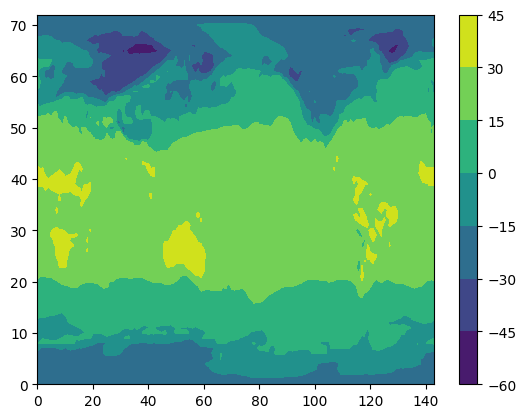

In [13]:
plt.contourf(ds_mx2t['mx2t'][0,:,:])
plt.colorbar()

In [14]:
#Download ERA5 RH, 1979-2022, 144*73
#https://drive.google.com/file/d/1SzuVhhBp7do5JnaKOJqeMhmx5XqcNqCp/view?usp=sharing
!gdown 1SzuVhhBp7do5JnaKOJqeMhmx5XqcNqCp

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Downloading...
From: https://drive.google.com/uc?id=1SzuVhhBp7do5JnaKOJqeMhmx5XqcNqCp
To: /content/ERA5_SFC_rh_1979-2022_r144x73_day.nc
100% 676M/676M [00:07<00:00, 86.3MB/s]


In [15]:
filename ='ERA5_SFC_rh_1979-2022_r144x73_day.nc'
ds_rh = xr.open_dataset(filename)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
ds_rh


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<xarray.Dataset>
Dimensions:  (time: 16071, lat: 73, lon: 144)
Coordinates:
  * time     (time) int32 0 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    rh       (time, lat, lon) float32 ...

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


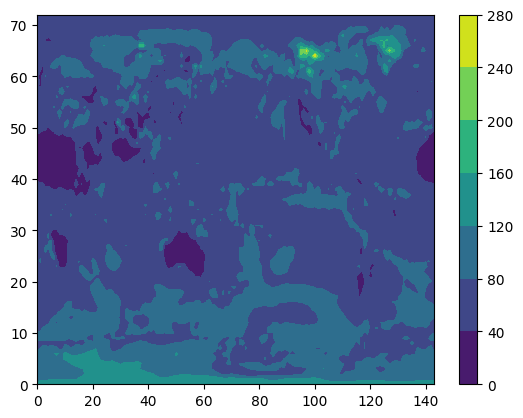

In [17]:
plt.contourf(ds_rh['rh'][0,:,:])
plt.colorbar()

In [18]:
#Download ERA5 wspd, 1979-2022, 144*73
#https://drive.google.com/file/d/112k082YPLLQZEjKQT4h-XN6H1v4iQA0d/view?usp=sharing
!gdown 112k082YPLLQZEjKQT4h-XN6H1v4iQA0d

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Downloading...
From: https://drive.google.com/uc?id=112k082YPLLQZEjKQT4h-XN6H1v4iQA0d
To: /content/ERA5_SFC_wspd_1979-2022_r144x73_day.nc
100% 676M/676M [00:07<00:00, 94.7MB/s]


In [19]:
filename ='ERA5_SFC_wspd_1979-2022_r144x73_day.nc'
ds_wspd = xr.open_dataset(filename)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
print(ds_wspd['wspd'])


<xarray.DataArray 'wspd' (time: 16071, lat: 73, lon: 144)>
[168938352 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01T11:00:00 ... 2022-12-31T11:00:00
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    cell_methods:   time: mean
    units:          m s**-1
    long_name:      U component of wind
    standard_name:  eastward_wind
    level:          1000.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


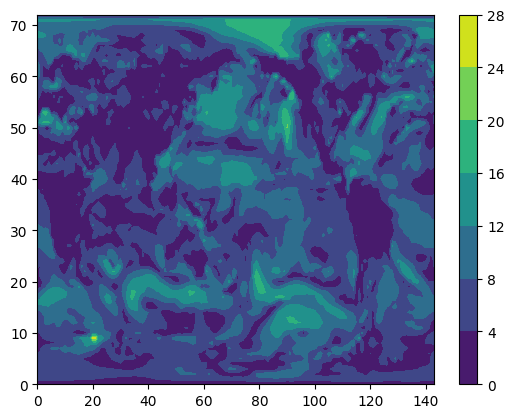

In [21]:
plt.contourf(ds_wspd['wspd'][0,:,:])
plt.colorbar()

In [22]:
import numpy as np
#Write the time format
ds_mx2t['time'] = ds_mx2t['time'].astype('datetime64[ns]')
ds_rh['time'] = ds_rh['time'].astype('datetime64[ns]')
ds_wspd['time'] = ds_wspd['time'].astype('datetime64[ns]')
print(ds_mx2t['time'].dtype)
print(ds_mx2t['time'])

start_date = np.datetime64('1979-01-01')
end_date = np.datetime64('2023-01-01')  # Adjust the end date as needed

# Create a time array with intervals of 1 day
time_array = np.arange(start_date, end_date, np.timedelta64(1, 'D'))

print(time_array)
ds_mx2t['time'] = time_array
ds_rh['time'] = time_array
ds_wspd['time'] = time_array

datetime64[ns]
<xarray.DataArray 'time' (time: 16071)>
array(['1970-01-01T00:00:00.000000000', '1970-01-01T00:00:00.000000000',
       '1970-01-01T00:00:00.000000000', ..., '1970-01-01T00:00:00.000000000',
       '1970-01-01T00:00:00.000000000', '1970-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01 1970-01-01 ... 1970-01-01
Attributes:
    standard_name:  time
    long_name:      Date
    units:          day as %Y%m%d.%f
    calendar:       proleptic_gregorian
    axis:           T
['1979-01-01' '1979-01-02' '1979-01-03' ... '2022-12-29' '2022-12-30'
 '2022-12-31']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
ds_mx2t = ds_mx2t.sel(time=slice('2017', '2019'))
ds_rh = ds_rh.sel(time=slice('2017', '2019'))
ds_wspd = ds_wspd.sel(time=slice('2017', '2019'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
def xutci(tbr, tr, v, rh):
    return xr.apply_ufunc(
        models.utci,
        tbr,
        tr,
        v,
        rh,
    )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
rh = ds_rh['rh']
t = ds_mx2t['mx2t']
wspd = ds_wspd['wspd']
utci = xutci(t, t, wspd, rh)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap

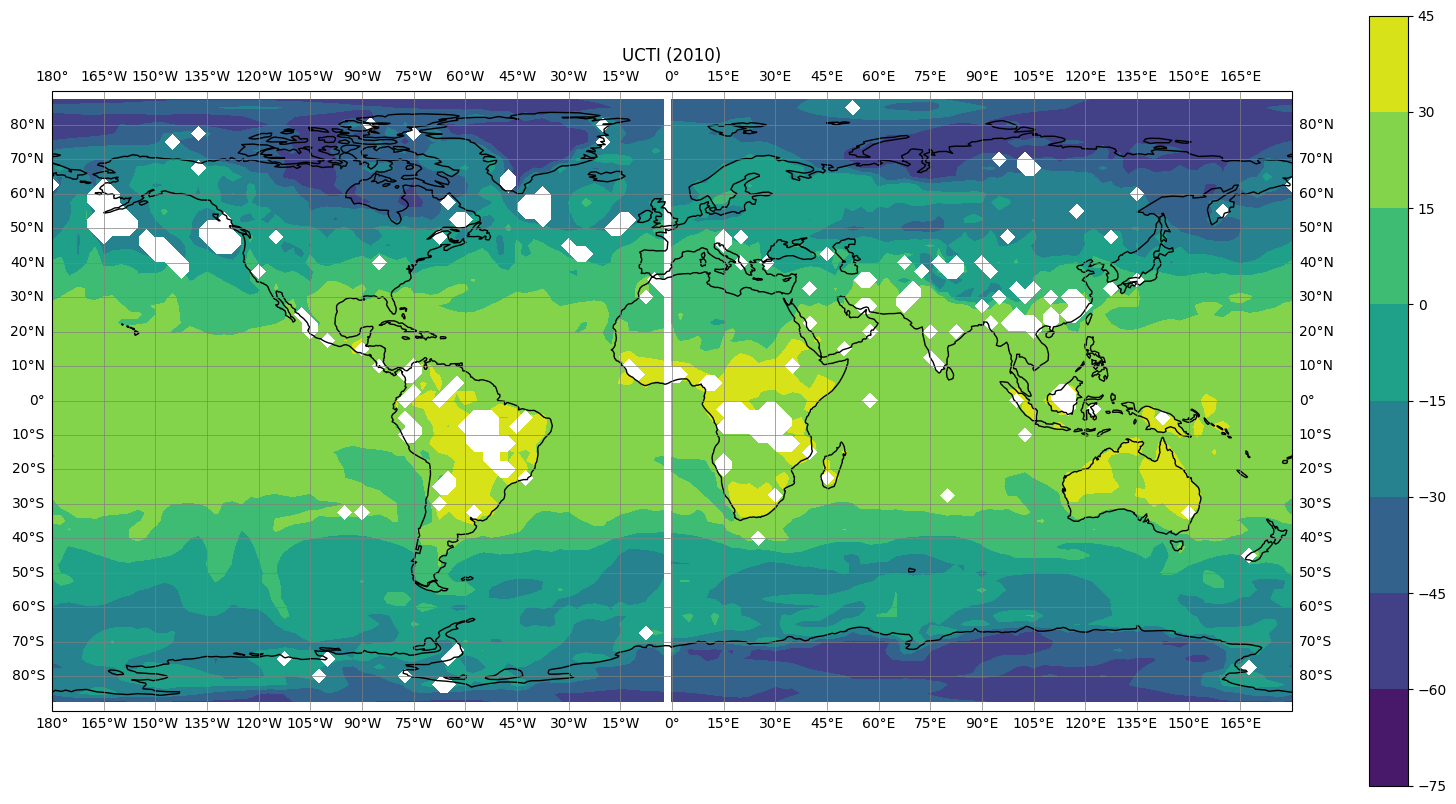

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()


In [27]:
import matplotlib.pyplot as plt  # making plots
lat = ds_mx2t['lat'][:]
lon = ds_mx2t['lon'][:]
utci2000 = utci[0,:,:]

plt.figure(figsize=(20,10))
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection)
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray',
             xlocs=range(-180,180,15), ylocs=range(-90,90,10))
ax.coastlines()

CS=plt.contourf(lon,lat,utci2000)
plt.colorbar(CS,orientation='vertical')
plt.title('UCTI (2010)')
plt.show()